In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_2016= pd.read_csv(r'C:\Users\LENOVO\Desktop\programacion\buques\data\buques-pasajeros-2016.csv',encoding='latin-1')

df_2016




,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,248,16,3,Salida,Pasajeros,2016
1,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,76,27,0,Entrada,Pasajeros,2016
2,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,83,16,0,Salida,Pasajeros,2016
3,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,268,14,10,Entrada,Pasajeros,2016
4,2016-01-26 00:00:00,ATLANTIC III,9001540,BUQUEBUS,316,33,2,Salida,Pasajeros,2016
...,...,...,...,...,...,...,...,...,...,...
9085,2016-12-31 00:00:00,MACAW ARROW,9566617,PUERTO BUENOS AIRES,0,22,0,Entrada,Carga,2016
9086,2016-12-31 00:00:00,SILVIA ANA L,9119385,BUQUEBUS,994,49,7,Salida,Pasajeros,2016
9087,2016-12-31 00:00:00,SILVIA ANA L,9119385,ROU - COLONIA,146,48,0,Entrada,Pasajeros,2016
9088,2016-12-31 00:00:00,SILVIA ANA L,9119385,BUQUEBUS,458,49,5,Salida,Pasajeros,2016


In [3]:
df_2017 = pd.read_csv(r'data\buques-pasajeros-2017.csv',encoding='latin-1')

df_2017

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2017-01-01 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,434,16,9,Salida,Pasajeros,2017
1,2017-01-01 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,347,1,7,Entrada,Pasajeros,2017
2,2017-01-01 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,328,15,10,Salida,Pasajeros,2017
3,2017-01-01 00:00:00,ATLANTIC III,9001540,BUQUEBUS,407,32,8,Salida,Pasajeros,2017
4,2017-01-01 00:00:00,ELADIA ISABEL,8869581,BUQUEBUS,340,35,4,Salida,Pasajeros,2017
...,...,...,...,...,...,...,...,...,...,...
8917,2017-12-31 00:00:00,JUAN PATRICIO,9610028,ROU - COLONIA,185,24,5,Entrada,Pasajeros,2017
8918,2017-12-31 00:00:00,SILVIA ANA L,9119385,ROU - COLONIA,531,40,3,Entrada,Pasajeros,2017
8919,2017-12-31 00:00:00,SILVIA ANA L,9119385,BUQUEBUS,677,43,3,Salida,Pasajeros,2017
8920,2017-12-31 00:00:00,SILVIA ANA L,9119385,ROU - COLONIA,206,43,0,Entrada,Pasajeros,2017


In [4]:
df_2018 = pd.read_csv(r'data\buques-pasajeros-2018.csv',encoding='latin-1')
df_2018

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2018-01-01 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,365,14,10,Salida,Pasajeros,2018
1,2018-01-01 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,515,14,17,Entrada,Pasajeros,2018
2,2018-01-01 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,308,15,5,Salida,Pasajeros,2018
3,2018-01-01 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,554,16,9,Entrada,Pasajeros,2018
4,2018-01-01 00:00:00,ATLANTIC III,9001540,BUQUEBUS,148,30,3,Salida,Pasajeros,2018
...,...,...,...,...,...,...,...,...,...,...
8789,2018-12-31 00:00:00,NaN,9119385,BUQUEBUS,677,47,8,Salida,Pasajeros,2018
8790,2018-12-31 00:00:00,NaN,4224,PUERTO BUENOS AIRES,0,9,0,Salida,Carga,2018
8791,2018-12-31 00:00:00,NaN,8919506,ROU - COLONIA,210,14,6,Entrada,Pasajeros,2018
8792,2018-12-31 00:00:00,NaN,8919506,ROU - COLONIA,481,15,7,Entrada,Pasajeros,2018


In [5]:
df_2019= pd.read_csv(r'data\buques-pasajeros-2019.csv',encoding='latin-1') 
df_2019

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2019-01-01 00:00:00,NaN,9610028,BUQUEBUS,415,44,5,Salida,Pasajeros,2019
1,2019-01-01 00:00:00,NaN,9001540,BUQUEBUS,458,27,4,Salida,Pasajeros,2019
2,2019-01-01 00:00:00,NaN,8919506,COLONIA EXPRESS BAIRES,286,14,3,Salida,Pasajeros,2019
3,2019-01-01 00:00:00,NaN,9001540,ROU - COLONIA,230,28,1,Entrada,Pasajeros,2019
4,2019-01-01 00:00:00,NaN,8919506,ROU - COLONIA,246,13,2,Entrada,Pasajeros,2019
...,...,...,...,...,...,...,...,...,...,...
6510,2019-12-31 00:00:00,SILVIA ANA L,9119385,ROU - COLONIA,404,44,2,Entrada,Pasajeros,2019
6511,2019-12-31 00:00:00,SUPER FERRY EXPRESS,8919506,ROU - COLONIA,329,15,2,Entrada,Pasajeros,2019
6512,2019-12-31 00:00:00,SUPER FERRY EXPRESS,8919506,COLONIA EXPRESS BAIRES,457,15,3,Salida,Pasajeros,2019
6513,2019-12-31 00:00:00,SUPER FERRY EXPRESS,8919506,ROU - COLONIA,170,15,4,Entrada,Pasajeros,2019


In [6]:
df_2020=pd.read_csv(r'data\buques-pasajeros-2020.csv',encoding='latin-1')

df_2020

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,343.0,17.0,8.0,Entrada,Pasajeros,2020
1,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,94.0,16.0,1.0,Salida,Pasajeros,2020
2,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,605.0,29.0,5.0,Entrada,Pasajeros,2020
3,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,62.0,15.0,1.0,Entrada,Pasajeros,2020
4,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,278.0,16.0,2.0,Salida,Pasajeros,2020
...,...,...,...,...,...,...,...,...,...,...
3140,2020-12-30 00:00:00,MSC AVNI,9756729.0,PUERTO BUENOS AIRES,0.0,25.0,0.0,Salida,Carga,2020
3141,2020-12-30 00:00:00,MSC SOFIA CELESTE,9702091.0,PUERTO BUENOS AIRES,0.0,29.0,0.0,Entrada,Carga,2020
3142,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Entrada,Pasajeros,2020
3143,2020-12-31 00:00:00,ATHLOS,9700483.0,PUERTO BUENOS AIRES,0.0,21.0,0.0,Salida,Carga,2020


In [7]:
df_2021=pd.read_csv(r'data\buques-pasajeros-2021.csv',encoding='latin-1')
df_2021

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2021-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Entrada,Pasajeros,2021
1,2021-01-02 00:00:00,ISABELLE I,7801843.0,PUERTO BUENOS AIRES,0.0,11.0,0.0,Salida,Carga,2021
2,2021-01-04 00:00:00,FRANCISCO,9610028.0,BUQUEBUS,263.0,19.0,11.0,Entrada,Pasajeros,2021
3,2021-01-04 00:00:00,FRANCISCO,9610028.0,BUQUEBUS,0.0,19.0,0.0,Salida,Pasajeros,2021
4,2021-01-04 00:00:00,MINERVA,9778155.0,PUERTO BUENOS AIRES,0.0,14.0,0.0,Entrada,Carga,2021
...,...,...,...,...,...,...,...,...,...,...
1328,2021-10-28 00:00:00,JOYCE,9338814.0,PUERTO BUENOS AIRES,0.0,22.0,0.0,Entrada,Carga,2021
1329,2021-10-28 00:00:00,NORTHERN MAGNITUDE,9252553.0,PUERTO BUENOS AIRES,0.0,24.0,0.0,Salida,Carga,2021
1330,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,171.0,13.0,1.0,Entrada,Pasajeros,2021
1331,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,84.0,13.0,1.0,Salida,Pasajeros,2021


In [8]:
df = pd.concat([df_2016,df_2017,df_2018,df_2019,df_2020,df_2021])

df

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,248.0,16.0,3.0,Salida,Pasajeros,2016
1,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,76.0,27.0,0.0,Entrada,Pasajeros,2016
2,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,83.0,16.0,0.0,Salida,Pasajeros,2016
3,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,268.0,14.0,10.0,Entrada,Pasajeros,2016
4,2016-01-26 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,316.0,33.0,2.0,Salida,Pasajeros,2016
...,...,...,...,...,...,...,...,...,...,...
1328,2021-10-28 00:00:00,JOYCE,9338814.0,PUERTO BUENOS AIRES,0.0,22.0,0.0,Entrada,Carga,2021
1329,2021-10-28 00:00:00,NORTHERN MAGNITUDE,9252553.0,PUERTO BUENOS AIRES,0.0,24.0,0.0,Salida,Carga,2021
1330,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,171.0,13.0,1.0,Entrada,Pasajeros,2021
1331,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,84.0,13.0,1.0,Salida,Pasajeros,2021


In [9]:
df.isnull().sum()

fecha          0
buque       5298
imo           70
puerto        70
pax           70
trip          70
exentos       70
sentido        0
servicio       0
anio           0
dtype: int64

In [10]:
df[df.duplicated()]

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
195,2016-01-31 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,0.0,31.0,0.0,Salida,Pasajeros,2016
510,2016-02-09 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,0.0,29.0,0.0,Salida,Pasajeros,2016
3917,2016-06-04 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,0.0,1.0,0.0,Salida,Pasajeros,2016
3918,2016-06-04 00:00:00,ATLANTIC III,9001540.0,ROU - COLONIA,0.0,1.0,0.0,Entrada,Pasajeros,2016
4336,2016-06-20 00:00:00,JUAN PATRICIO,9610028.0,BUQUEBUS,0.0,27.0,0.0,Salida,Pasajeros,2016
5661,2016-08-15 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,0.0,31.0,0.0,Salida,Pasajeros,2016
6968,2016-10-10 00:00:00,COLONIA EXPRESS,8704937.0,COLONIA EXPRESS BAIRES,0.0,10.0,0.0,Salida,Pasajeros,2016
8422,2016-12-11 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,0.0,32.0,0.0,Salida,Pasajeros,2016
1788,2017-02-24 00:00:00,COLONIA EXPRESS,8704937.0,ROU - COLONIA,0.0,1.0,0.0,Entrada,Pasajeros,2017
3666,2017-06-04 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,210.0,14.0,2.0,Salida,Pasajeros,2017


In [11]:
df.drop_duplicates(keep=False, inplace=True)

df

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,248.0,16.0,3.0,Salida,Pasajeros,2016
1,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,76.0,27.0,0.0,Entrada,Pasajeros,2016
2,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,83.0,16.0,0.0,Salida,Pasajeros,2016
3,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,268.0,14.0,10.0,Entrada,Pasajeros,2016
4,2016-01-26 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,316.0,33.0,2.0,Salida,Pasajeros,2016
...,...,...,...,...,...,...,...,...,...,...
1328,2021-10-28 00:00:00,JOYCE,9338814.0,PUERTO BUENOS AIRES,0.0,22.0,0.0,Entrada,Carga,2021
1329,2021-10-28 00:00:00,NORTHERN MAGNITUDE,9252553.0,PUERTO BUENOS AIRES,0.0,24.0,0.0,Salida,Carga,2021
1330,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,171.0,13.0,1.0,Entrada,Pasajeros,2021
1331,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,84.0,13.0,1.0,Salida,Pasajeros,2021


In [12]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,imo,pax,trip,exentos,anio
count,37621.000,37621.000,37621.000,37621.000,37691.000
mean,9130665.951,320.210,43.242,3.822,2017.727
std,6028432.122,409.744,121.874,4.877,1.395
min,0.000,0.000,1.000,0.000,2016.000
25%,8919506.000,45.000,16.000,0.000,2017.000
50%,9119385.000,252.000,26.000,2.000,2018.000
75%,9610028.000,438.000,37.000,6.000,2019.000
max,636015665.000,4045.000,1347.000,48.000,2021.000


In [13]:
df['buque'].nunique()

1086

In [14]:
df['imo'].nunique()

1163

In [15]:
df['buque'].value_counts().loc[lambda x: x>100]

SILVIA ANA L            4627
FRANCISCO               4359
ATLANTIC III            4194
ATLANTIC EXPRESS        3674
JUAN PATRICIO           3030
COLONIA EXPRESS         2908
ELADIA ISABEL            712
SUPER FERRY EXPRESS      533
BUENOS AIRES EXPRESS     372
PATRICIA OLIVIA II       246
PIRAVERA                 110
ROSA                     109
Name: buque, dtype: int64

In [16]:
df['puerto'].value_counts()

ROU - COLONIA                     11319
BUQUEBUS                          10081
PUERTO BUENOS AIRES                8358
COLONIA EXPRESS BAIRES             4478
ROU - MONTEVIDEO                   2604
TERMINAL CRUCEROS PTO. BS. AS.      781
Name: puerto, dtype: int64

In [17]:
df['sentido'].value_counts()

Entrada    18913
Salida     18778
Name: sentido, dtype: int64

In [18]:
df['servicio'].value_counts()

Pasajeros    29366
Carga         8325
Name: servicio, dtype: int64

In [19]:
df['anio'].value_counts()

2016    9074
2017    8896
2018    8768
2019    6489
2020    3131
2021    1333
Name: anio, dtype: int64

In [20]:
df['cantidad_dias'] = df['fecha'].rank(method='dense').astype(int)

df

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio,cantidad_dias
0,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,248.0,16.0,3.0,Salida,Pasajeros,2016,1
1,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,76.0,27.0,0.0,Entrada,Pasajeros,2016,1
2,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,83.0,16.0,0.0,Salida,Pasajeros,2016,1
3,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,268.0,14.0,10.0,Entrada,Pasajeros,2016,1
4,2016-01-26 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,316.0,33.0,2.0,Salida,Pasajeros,2016,1
...,...,...,...,...,...,...,...,...,...,...,...
1328,2021-10-28 00:00:00,JOYCE,9338814.0,PUERTO BUENOS AIRES,0.0,22.0,0.0,Entrada,Carga,2021,1976
1329,2021-10-28 00:00:00,NORTHERN MAGNITUDE,9252553.0,PUERTO BUENOS AIRES,0.0,24.0,0.0,Salida,Carga,2021,1976
1330,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,171.0,13.0,1.0,Entrada,Pasajeros,2021,1976
1331,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,84.0,13.0,1.0,Salida,Pasajeros,2021,1976


In [21]:
carga=df[df['servicio']=='Carga']

index=df['servicio'].value_counts().index

values=df['servicio'].value_counts().values

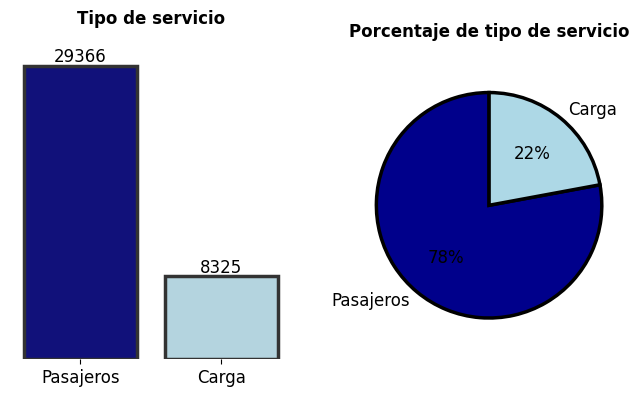

In [33]:
palette=['darkblue','lightblue']

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(8,4))


sns.countplot(ax=ax[0],x=df['servicio'],palette=palette,linewidth=2.5, edgecolor=".2")
ax[0].set_title('Tipo de servicio',size=12,weight='bold',pad=20)
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(labelleft=False, left=False,labelsize=12)


for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=12);
    
    
    
plt.pie(values, labels = index, autopct='%.0f%%' ,colors=['darkblue','lightblue'],wedgeprops={"edgecolor":"0",'linewidth': 2.5,
                    'antialiased': True},startangle=90,textprops={'fontsize': 12})
ax[1].set_title('Porcentaje de tipo de servicio',size=12,weight='bold',pad=20);

fig.savefig("servicio.jpg",bbox_inches = 'tight')

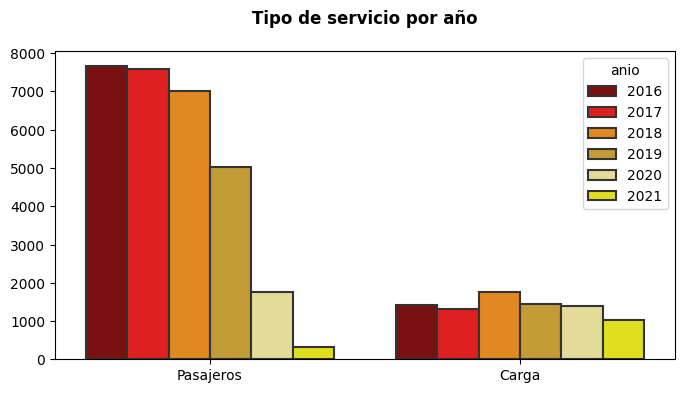

In [23]:
plt.rcParams['figure.figsize']= 8,4

palette=['darkred','red','darkorange','goldenrod','khaki','yellow']
plt.rcParams['axes.spines.left'] = True
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.title("Tipo de servicio por año",size=12,weight='bold',pad=20)
sns.countplot(data=df,x='servicio',hue='anio',linewidth=1.5, edgecolor=".2",palette=palette)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

In [24]:
df['puerto'].value_counts()

ROU - COLONIA                     11319
BUQUEBUS                          10081
PUERTO BUENOS AIRES                8358
COLONIA EXPRESS BAIRES             4478
ROU - MONTEVIDEO                   2604
TERMINAL CRUCEROS PTO. BS. AS.      781
Name: puerto, dtype: int64

In [25]:
df['fecha']= pd.to_datetime(df['fecha']).dt.date

df['mes'] = pd.to_datetime(df['fecha']).dt.month

df['año'] = pd.to_datetime(df['fecha']).dt.year

df['dia_semana'] = pd.to_datetime(df['fecha']).dt.weekday

df['semana_año'] = pd.to_datetime(df['fecha']).dt.isocalendar().week

df['dia'] = pd.to_datetime(df['fecha']).dt.day

df['dayofyear'] =pd.to_datetime(df['fecha']).dt.dayofyear

In [26]:
df

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio,cantidad_dias,mes,año,dia_semana,semana_año,dia,dayofyear
0,2016-01-26,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,248.0,16.0,3.0,Salida,Pasajeros,2016,1,1,2016,1,4,26,26
1,2016-01-26,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,76.0,27.0,0.0,Entrada,Pasajeros,2016,1,1,2016,1,4,26,26
2,2016-01-26,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,83.0,16.0,0.0,Salida,Pasajeros,2016,1,1,2016,1,4,26,26
3,2016-01-26,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,268.0,14.0,10.0,Entrada,Pasajeros,2016,1,1,2016,1,4,26,26
4,2016-01-26,ATLANTIC III,9001540.0,BUQUEBUS,316.0,33.0,2.0,Salida,Pasajeros,2016,1,1,2016,1,4,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,2021-10-28,JOYCE,9338814.0,PUERTO BUENOS AIRES,0.0,22.0,0.0,Entrada,Carga,2021,1976,10,2021,3,43,28,301
1329,2021-10-28,NORTHERN MAGNITUDE,9252553.0,PUERTO BUENOS AIRES,0.0,24.0,0.0,Salida,Carga,2021,1976,10,2021,3,43,28,301
1330,2021-10-28,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,171.0,13.0,1.0,Entrada,Pasajeros,2021,1976,10,2021,3,43,28,301
1331,2021-10-28,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,84.0,13.0,1.0,Salida,Pasajeros,2021,1976,10,2021,3,43,28,301


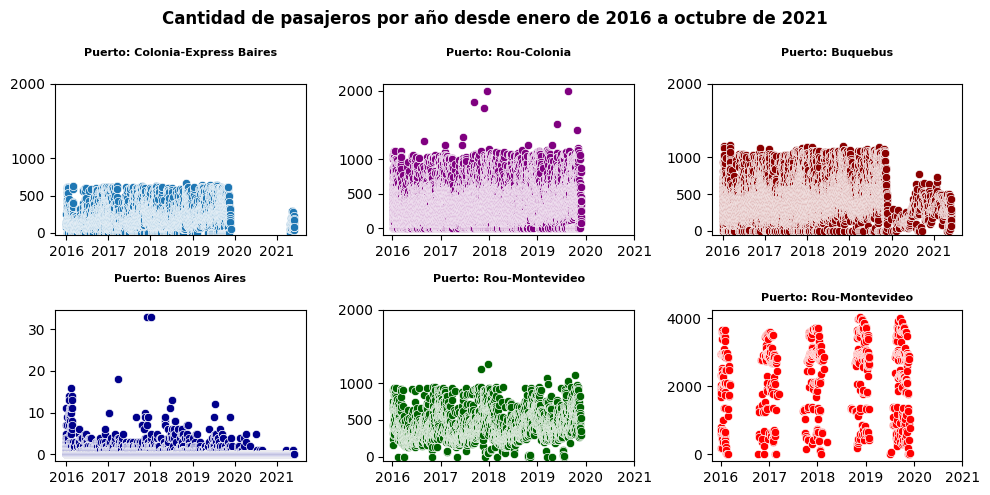

In [27]:
colonia = df[df['puerto']=='COLONIA EXPRESS BAIRES']
rou_colonia = df[df['puerto']=='ROU - COLONIA']
buquebus = df[ df['puerto']=='BUQUEBUS']
puerto_bsas = df[df['puerto']=='PUERTO BUENOS AIRES']
rou_montevideo = df[df['puerto']== 'ROU - MONTEVIDEO']
terminal = df[df['puerto']== 'TERMINAL CRUCEROS PTO. BS. AS.']

str_list = ['2016','2017','2018','2019','2020','2021']

fig, ax= plt.subplots(nrows=2, ncols=3, figsize=(10,5))

plt.suptitle('Cantidad de pasajeros por año desde enero de 2016 a octubre de 2021',size=12,weight='bold')

#PUERTO COLONIA EXPRESS BAIRES

sns.scatterplot(data=colonia, x='cantidad_dias',y='pax',ax=ax[0,0])
ax[0,0].set_title('Puerto: Colonia-Express Baires',size=8,weight='bold',pad=20)
#ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0,0].set_ylabel(None)
ax[0,0].set_xlabel(None)
ax[0,0].set_xticks([0,365,730,1095,1460,1825])
ax[0,0].set_xticklabels(str_list)
ax[0,0].set_yticks([0,500,1000,2000])
#ax[0].tick_params(labelleft=False, left=False,labelsize=12)

#PUERTO ROU-COLONIA
sns.scatterplot(data=rou_colonia, x='cantidad_dias',y='pax',ax=ax[0,1],color='purple')

ax[0,1].set_title('Puerto: Rou-Colonia',size=8,weight='bold',pad=20)
#ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0,1].set_ylabel(None)
ax[0,1].set_xlabel(None)
ax[0,1].set_xticks([0,365,730,1095,1460,1825])
ax[0,1].set_xticklabels(str_list)
ax[0,1].set_yticks([0,500,1000,2000])
#ax[0].tick_params(labelleft=False, left=False,labelsize=12)



#PUERTO BUQUEBUS
sns.scatterplot(data=buquebus, x='cantidad_dias',y='pax',ax=ax[0,2],color='darkred')
ax[0,2].set_title('Puerto: Buquebus',size=8,weight='bold',pad=20)
#ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0,2].set_ylabel(None)
ax[0,2].set_xlabel(None)
ax[0,2].set_xticks([0,365,730,1095,1460,1825])
ax[0,2].set_xticklabels(str_list)
ax[0,2].set_yticks([0,500,1000,2000])
#ax[0].tick_params(labelleft=False, left=False,labelsize=12)




#PUERTO BUENOS AIRES
sns.scatterplot(data=puerto_bsas, x='cantidad_dias',y='pax',ax=ax[1,0],color='darkblue')
ax[1,0].set_title('Puerto: Buenos Aires',size=8,weight='bold',pad=20)
#ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[1,0].set_ylabel(None)
ax[1,0].set_xlabel(None)
ax[1,0].set_xticks([0,365,730,1095,1460,1825])
ax[1,0].set_xticklabels(str_list)
#ax[0].tick_params(labelleft=False, left=False,labelsize=12)



#PUERTO ROU-MONTEVIDEO
sns.scatterplot(data=rou_montevideo, x='cantidad_dias',y='pax',ax=ax[1,1],color='darkgreen')
ax[1,1].set_title('Puerto: Rou-Montevideo',size=8,weight='bold',pad=20)
#ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[1,1].set_ylabel(None)
ax[1,1].set_xlabel(None)
ax[1,1].set_xticks([0,365,730,1095,1460,1825])
ax[1,1].set_yticks([0,500,1000,2000])
ax[1,1].set_xticklabels(str_list)
#ax[0].tick_params(labelleft=False, left=False,labelsize=12)




#PUERTO ROU-MONTEVIDEO
sns.scatterplot(data=terminal, x='cantidad_dias',y='pax',ax=ax[1,2],color='red')

ax[1,2].set_title('Puerto: Rou-Montevideo',size=8,weight='bold')
#ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[1,2].set_ylabel(None)
ax[1,2].set_xlabel(None)
ax[1,2].set_xticks([0,365,730,1095,1460,1825])
ax[1,2].set_xticklabels(str_list)
ax[1,2].set_yticks([0,2000,4000])
#ax[0].tick_params(labelleft=False, left=False,labelsize=12)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()


In [28]:
terminal['mes'].value_counts()

2     269
1     204
12    141
3     123
11     32
4       7
10      5
Name: mes, dtype: int64

In [29]:
terminal['servicio'].value_counts()

Pasajeros    781
Name: servicio, dtype: int64

In [30]:
mes_codigo= {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',
             7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}

df['mes'] = df['mes'].map(mes_codigo)

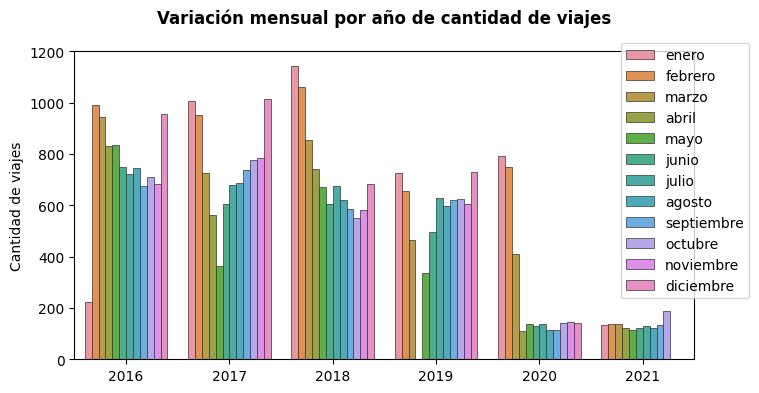

In [31]:
plt.title("Variación mensual por año de cantidad de viajes",size=12,weight='bold',pad=20)
sns.countplot(data=df,x='anio',hue='mes',linewidth=0.5, edgecolor=".2")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel(None)
plt.ylabel('Cantidad de viajes')

plt.show()